In [68]:
import scanpy as sc
import anndata as ad
import os

In [256]:
DATA_PATH="../../data/simulated/Synthetic_2000/dyn-SW/dyn-SW-2000-2/"
# DATA_PATH="../../data/simulated/Synthetic_1000/dyn-BFStrange/dyn-BFStrange-1000-1/"
adata = ad.read_h5ad(os.path.join(DATA_PATH, "anndata.h5ad"))

In [257]:
sc.tl.leiden(adata, resolution = 25)
sc.tl.paga(adata)

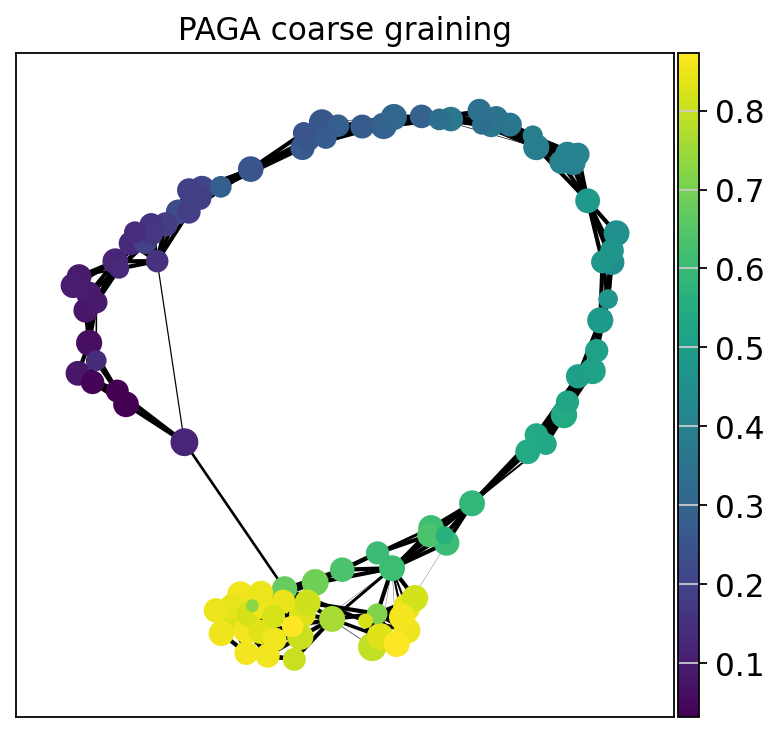

In [258]:
sc.set_figure_params(figsize = (5, 5))
sc.pl.paga(adata, color ="dpt", edge_width_scale = 0.25, labels = ["" for i in adata.obs.leiden.cat.categories], 
           title = "PAGA coarse graining", save = "switch_paga_layout")

In [259]:
adata.write_h5ad(os.path.join(DATA_PATH, "anndata_paga.h5ad"))

In [260]:
import nimfa
import numpy as np
nmf = nimfa.Nmf(adata.X.T, rank = 5)
nmf_fit = nmf()

(-0.5, 4.5, 1999.5, -0.5)

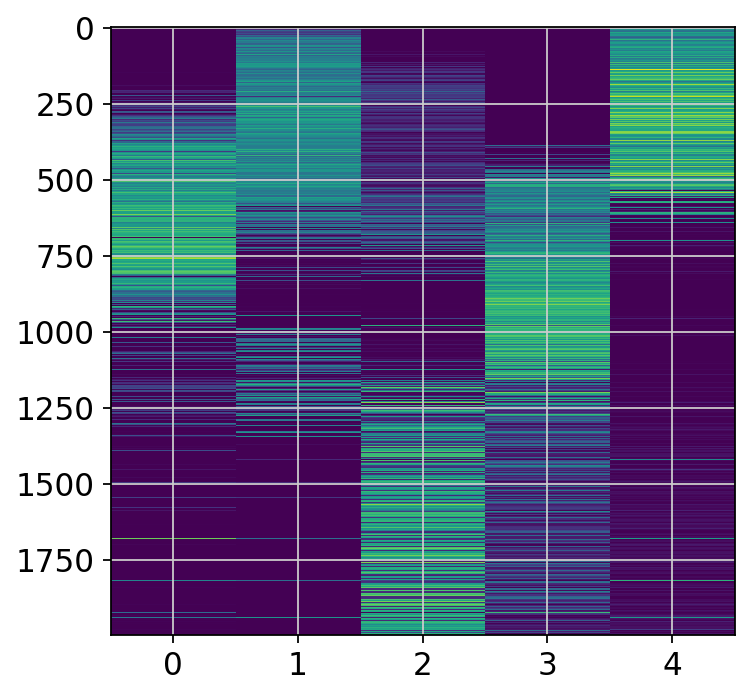

In [261]:
plt.imshow(nmf_fit.coef().T[np.argsort(adata.obs.dpt), :], interpolation = "none")
plt.axis("auto")